# Import the TensorFlow Library, Switch to GPU, and Learn the Shape of your Data

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)
print(tf.test.gpu_device_name())

2.14.0
/device:GPU:0


In [3]:
#load data into an object called digits
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [5]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

# Learn Classes/Labels/Output

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Take the Images Key and Pass it into the Variable "Images"

In [7]:
#load the images from the data set in to an array (3D) called images
images = digits.images

In [8]:
images.shape

(1797, 8, 8)

# Store First Image in Dataset into Image0, Print, and Display as an Image

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


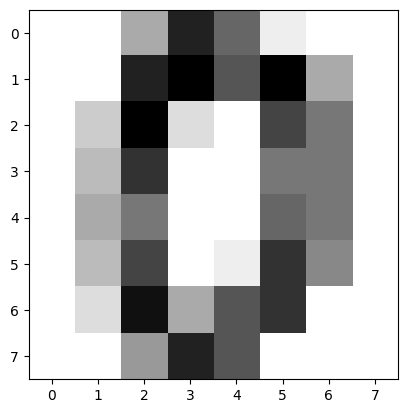

In [9]:
image0 = images[0]

print(image0)

import matplotlib.pyplot as plt
plt.imshow(image0,cmap="binary")
plt.show()

# Store the Labels/Answers/Output (Values of Classes) in Array called Targets

In [10]:
targets = digits.target

In [11]:
targets.shape

(1797,)

In [12]:
targets[0]

0

In [13]:
print(targets)

[0 1 2 ... 8 9 8]


# Store Flattened Version of Handwriting Specimens: Model will internally convert the 8X8 image into a 64 array

In [14]:
#we will not be using the array data in training or testing the model
#ignore digits.data
data = digits.data

In [15]:
#not needed
data.shape

(1797, 64)

In [16]:
#not needed
data.dtype

dtype('float64')

In [17]:
#not needed
data0 = data[0]

In [18]:
#not needed
print(data0)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [19]:
#Determine the data type of the arrays that store the numbers
images.dtype

dtype('float64')

# Create Training and Test Datasets (Includes Features and Labels)

In [20]:
#creatings training and test datasets (includes features and labels/targets)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, targets,test_size = 0.33, random_state=0)

In [21]:
#X_train contains 1203 images (8x8) -- 67% of the overall data
X_train.shape

(1203, 8, 8)

In [22]:
#X_test contains 594 images (8x8) --  33% of the overall data set
X_test.shape

(594, 8, 8)

In [23]:
y_train.shape

(1203,)

In [24]:
y_test.shape

(594,)

In [25]:
#normalizing the pixel values in the images to be in the range of
#0 and 1
s_train = X_train/16.0
s_test = X_test/16.0

In [26]:
#create a dataset that has both the features and labels needed for training
#within the same dataset
train_dataset = tf.data.Dataset.from_tensor_slices((s_train, y_train))

#create a dataset that has both the features and labels needed for testing
#within the same dataset
test_dataset = tf.data.Dataset.from_tensor_slices((s_test, y_test))

In [27]:
for item in train_dataset.take(2):
  print(item)
  print()

(<tf.Tensor: shape=(8, 8), dtype=float64, numpy=
array([[0.    , 0.    , 0.8125, 1.    , 1.    , 0.9375, 0.125 , 0.    ],
       [0.    , 0.    , 0.875 , 0.8125, 0.6875, 1.    , 0.125 , 0.    ],
       [0.    , 0.    , 0.6875, 0.8125, 0.9375, 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.3125, 1.    , 0.625 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , 0.875 , 0.9375, 0.    , 0.    , 0.    ],
       [0.    , 0.0625, 0.875 , 0.1875, 0.9375, 0.4375, 0.    , 0.    ],
       [0.    , 0.375 , 0.6875, 0.    , 0.9375, 0.375 , 0.    , 0.    ],
       [0.    , 0.0625, 0.8125, 1.    , 0.9375, 0.1875, 0.    , 0.    ]])>, <tf.Tensor: shape=(), dtype=int64, numpy=8>)

(<tf.Tensor: shape=(8, 8), dtype=float64, numpy=
array([[0.    , 0.    , 0.    , 0.3125, 0.9375, 0.8125, 0.125 , 0.    ],
       [0.    , 0.    , 0.    , 0.75  , 0.4375, 0.6875, 0.375 , 0.    ],
       [0.    , 0.    , 0.    , 0.5625, 0.75  , 0.9375, 0.0625, 0.    ],
       [0.    , 0.    , 0.0625, 0.5   , 1.    , 0.

In [28]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

#Shuffle and create batches of 64 images for training. There will be multiple such batches in train_ds
train_ds = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

#shuffling is not needed in test_ds
test_ds = test_dataset.batch(BATCH_SIZE)


In [29]:
#let us look in to the first batch of train_ds
for item in train_ds.take(1):
  print(item)

(<tf.Tensor: shape=(64, 8, 8), dtype=float64, numpy=
array([[[0.    , 0.    , 0.6875, ..., 0.625 , 0.    , 0.    ],
        [0.    , 0.375 , 0.9375, ..., 0.25  , 0.    , 0.    ],
        [0.    , 0.3125, 0.75  , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.8125, ..., 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.625 , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.0625, 0.9375, ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.3125, 0.75  , ..., 0.8125, 0.    , 0.    ],
        ...,
        [0.    , 0.3125, 0.5   , ..., 0.3125, 0.625 , 0.    ],
        [0.    , 0.    , 0.875 , ..., 0.875 , 0.375 , 0.    ],
        [0.    , 0.    , 0.4375, ..., 0.625 , 0.    , 0.    ]],

       [[0.    , 0.125 , 0.9375, ..., 0.    , 0.    , 0.    ],
        [0.    , 0.3125, 1.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.5625, 0.9375, ..

In [30]:
#ignore this cell
for item in train_ds.take(1):
  in_shape = item[0].shape[1:]

print(in_shape)

(8, 8)


In [31]:
#specific that the input data shape is 8x8 (since the images are 8x8)
#tensorflow with internally address the conversion so the 8x8 images
#can be fed to 64 neurons of the input layer
input_shape1 = (8,8)

In [32]:
print(input_shape1)

(8, 8)


In [33]:
#import modules from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [34]:
#specific the structure of the model
model = Sequential([Flatten(input_shape =input_shape1 ),Dense(256, activation="relu"), Dense(10, activation="softmax")])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 19210 (75.04 KB)
Trainable params: 19210 (75.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
#specify the optimization, loss and metrics to be used during training (fit)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

# Train the Model and Test for Validation at the End of Each Epoch

In [37]:
history = model.fit(train_ds, epochs=60, validation_data=(test_ds))

Epoch 1/60
19/19 [==============================] - 9s 13ms/step - loss: 2.0473 - accuracy: 0.4514 - val_loss: 1.7478 - val_accuracy: 0.7088
Epoch 2/60
19/19 [==============================] - 0s 4ms/step - loss: 1.4283 - accuracy: 0.8296 - val_loss: 1.2016 - val_accuracy: 0.8266
Epoch 3/60
19/19 [==============================] - 0s 4ms/step - loss: 0.9446 - accuracy: 0.8878 - val_loss: 0.8221 - val_accuracy: 0.8754
Epoch 4/60
19/19 [==============================] - 0s 5ms/step - loss: 0.6454 - accuracy: 0.9077 - val_loss: 0.6058 - val_accuracy: 0.8906
Epoch 5/60
19/19 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.9202 - val_loss: 0.4738 - val_accuracy: 0.9209
Epoch 6/60
19/19 [==============================] - 0s 4ms/step - loss: 0.3779 - accuracy: 0.9327 - val_loss: 0.3933 - val_accuracy: 0.9276
Epoch 7/60
19/19 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 0.9460 - val_loss: 0.3367 - val_accuracy: 0.9360
Epoch 8/60
19/19 [=

In [38]:
#find the accuracy of the trained model against the test data set.
model.evaluate(test_ds)

10/10 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.9798


[0.09222365915775299, 0.9797979593276978]